# **Projet : Manipulationn de Base de données NoSQL**

### Table des Matières

- [Introduction](#Intro)
- [MongoDB](#mongo)
- [Conclusion](#Concl)

<a name="Intro"></a>
## **Introduction**

Du fait du contexte **Big Data**, les bases de données **NoSQL** peuvent enregistrer et traiter sans problème de gros volumes de données. 

**NoSQL** est aussi un complément utile des bases de données **SQL** relationnelles traditionnelles. 

![imag](images/DB_piechart.png)

Il existe plusieurs types de bases de données **NoSQL**. 

Les plus populaires sont présentés ci-dessous :

- Orienté **clés-valeurs** #1 [Redis](https://redis.io/)
- Orienté **documents** #1 [MongoDB](https://www.mongodb.com/)
- Orienté **larges colonnes** #1 [Cassandra](https://cassandra.apache.org/_/index.html)
- Orienté **graphes** #1 [Neo4j](https://neo4j.com/fr/)

Pour plus d'infos sur **NoSQL**, [DSE FMP CU](https://www.ksi.mff.cuni.cz/~svoboda/courses/2016-2-MIE-PDB/lectures/Lecture-06-NoSQL.pdf) et [db-engines](https://db-engines.com/en/ranking)
 

<a name="mongo"></a>
## **MongoDB**

MongoDB est une base de données orientée documents, connues sous le nom de données semi-structurées..


![imag](images/mongo.jpg)


### Les opérations CRUD

#### CREATE

In [12]:
# Importation de la libraires
import pymongo

# La connexion est ouverte au port 27017
client = pymongo.MongoClient('localhost', 27017)

# creation de la base de données "projet"
mydb = client["projet"]

# création d'une collection
collection = mydb["example1"]

In [13]:
# Insertion de données dans mongoDB

exemple = {  "nom" : "MONDJEHI",
             "prenom" : "ROLAND",
             "age" : 25,
             "email" : "mondrolan@gmail.com"}

collection.insert_one(exemple)

In [14]:
# Inserer plusieurs données

exemples = [{  "nom" : "MONDJEHI",
             "prenom" : "Jean Marie",
             "age" : 30,
             "email" : "mondjehijeanmarie@gmail.com"},
            
              {  "nom" : "MONDJEHI",
             "prenom" : "Wilfred",
             "age" : 26,
             "email" : "mondjehiwilfred@gmail.com"}]

collection.insert_many(exemples)

#### READ

In [15]:
# Obtenir la liste des collections

print(mydb.list_collection_names())



['example1']


In [16]:
# obtenir un document

doc = collection.find_one()
print(doc)



{'_id': ObjectId('63a64ad78320cb5b2a745ad1'), 'nom': 'MONDJEHI', 'prenom': 'ROLAND', 'age': 25, 'email': 'mondrolan@gmail.com'}


In [18]:
# Obtenir un document spécifique

doc = collection.find_one({"prenom":"Wilfred"})
print(doc)

{'_id': ObjectId('63a64c358320cb5b2a745ad3'), 'nom': 'MONDJEHI', 'prenom': 'Wilfred', 'age': 26, 'email': 'mondjehiwilfred@gmail.com'}


In [19]:
# Obtenir tous les documents

docs = collection.find()

for doc in docs:
    print(doc)

{'_id': ObjectId('63a64ad78320cb5b2a745ad1'), 'nom': 'MONDJEHI', 'prenom': 'ROLAND', 'age': 25, 'email': 'mondrolan@gmail.com'}
{'_id': ObjectId('63a64c358320cb5b2a745ad2'), 'nom': 'MONDJEHI', 'prenom': 'Jean Marie', 'age': 30, 'email': 'mondjehijeanmarie@gmail.com'}
{'_id': ObjectId('63a64c358320cb5b2a745ad3'), 'nom': 'MONDJEHI', 'prenom': 'Wilfred', 'age': 26, 'email': 'mondjehiwilfred@gmail.com'}


#### UPDATE

3 méthodes  *update_one()*, *update_many()* , *find_one_and_update()*

Mise à jour du prenom `Wilfred` à `WILFRED`


In [20]:
collection.update_one({"prenom": "Wilfred"},
                      {'$set': {
                          'prenom': "WILFRED"
                          }
                      }, upsert=False)

In [24]:
docs = collection.find()

for doc in docs:
    print(doc)

{'_id': ObjectId('63a64ad78320cb5b2a745ad1'), 'nom': 'MONDJEHI', 'prenom': 'ROLAND', 'age': 25, 'email': 'mondrolan@gmail.com'}
{'_id': ObjectId('63a64c358320cb5b2a745ad2'), 'nom': 'MONDJEHI', 'prenom': 'Jean Marie', 'age': 30, 'email': 'mondjehijeanmarie@gmail.com'}
{'_id': ObjectId('63a64c358320cb5b2a745ad3'), 'nom': 'MONDJEHI', 'prenom': 'WILFRED', 'age': 26, 'email': 'mondjehiwilfred@gmail.com'}


#### DELETE

In [23]:
# print number of document with the key x = 4

print("Nombre de documents avant suppression : ", collection.count_documents({'nom': 'MONDJEHI'}))

Nombre de documents avant suppression :  3


In [25]:
# Supprimer le document dont le prenom est WILFRED

collection.delete_one({'prenom': 'WILFRED'})

In [26]:
print("Nombre de documents après suppression : ", collection.count_documents({'nom': 'MONDJEHI'}))

Nombre de documents après suppression :  2


##### **MongoDB stocke des types de données spécifiques**

###### Une image

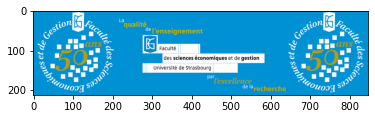

In [27]:
from PIL import Image
from matplotlib import pyplot

image = Image.open('images/FSEG.jpg')
pyplot.imshow(image)
pyplot.show()

Essayons de stocker cette image dans mongoDB

In [28]:
# Maintenant que l'image est chargée, nous devons la convertir en un tableau numpy
import numpy as np
from bson.binary import Binary
import pickle
import pymongo

# Conversion en numpy
data = np.asarray(image)

# Affichier les dimensions
print(data.shape)




(212, 847, 3)


In [29]:
#
post = {}

# pickle dump le tableau numpy et ensuite le binarise (rappel MongoDB = Bson = Bytes json)
post['image'] = Binary( pickle.dumps( data, protocol=2) ) 

client = pymongo.MongoClient('localhost', 27017)
mydb = client["projet"]
collection = mydb["image"]

collection.insert_one(post)

Rechargement de l'image

In [30]:
client = pymongo.MongoClient('localhost', 27017)
mydb = client["projet"]
collection = mydb["image"]
docs = collection.find()

In [31]:
# Charger l'objet binaire
doc =  pickle.loads(next(docs)["image"])

print(doc.shape,type(doc))



(212, 847, 3) <class 'numpy.ndarray'>


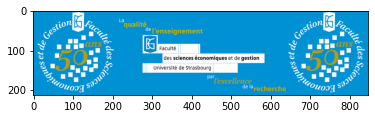

In [32]:
# De numpy à image
image = Image.fromarray(doc)

# Plot l'image
pyplot.imshow(image)
pyplot.show()

In [ ]:

# Charger l'objet binaire
doc =  pickle.loads(next(docs)["image"])

print(doc.shape,type(doc))

# From numpy to img
image = Image.fromarray(doc)
# Show image
pyplot.imshow(image)
pyplot.show()

### Mini-projet : Scrapper et stocker dans mongoDB ( **BeautifulSoup** et **Pymongo**)

In [33]:
import requests 
from bs4 import BeautifulSoup
import re
import tqdm.notebook as tq

In [35]:
# Utilisation d'un exemple
# A partir de la page wikipedia de Kevin Bacon
starting_url = "https://en.wikipedia.org/wiki/Kevin_Bacon"

# Obtenir le contenu html
response = requests.get(starting_url)
result = response.content

# Analyser le html avec BS
soup = BeautifulSoup(result, 'html.parser')

# Dans le corps du texte, trouvez tous les href qui correspondent à la requête regex
# (commencez par wiki et ignorez ! : pour éviter les artefacts comme les jpeg)
list_b = []
for link in soup.find("div",attrs={'id':'bodyContent'}).find_all("a",href = re.compile("^(/wiki/)((?!:).)*$")):
    list_b.append(link.get("href"))

In [38]:
print(len(list_b))
print(list_b[0:5])

428
['/wiki/Kevin_Bacon_(disambiguation)', '/wiki/Philadelphia', '/wiki/Kevin_Bacon_filmography', '/wiki/Kyra_Sedgwick', '/wiki/Sosie_Bacon']


In [39]:
# Un pas de plus, nous voulons traiter le texte et le sauvegarder dans MongoDB.

import pymongo 

class crawler:
    def __init__(self,starting_url, depth, mongo_uri, db_name, collection_name ):
        self.starting_url = starting_url
        self.depth = depth
        self.mongo_uri = mongo_uri
        self.db_name = db_name
        self.collection_name = collection_name
        self.hrefs_checked = []
        self.n_processed = 0
        
    def Get_hrefs(self,url):

        hrefs = []
        for link in self.soup.find("div",attrs={'id':'bodyContent'}).find_all("a",href = re.compile("^(/wiki/)((?!:).)*$")):
            if "href" in link.attrs:
                if link.get("href") not in hrefs:
                    hrefs.append(link.get("href"))
        return(hrefs)
    
    def parse_url(self): 
        full_text = ""
        for para in self.soup.find_all("p"):
            full_text += para.text + " "
        return(full_text)
    
    def save2mongo(self):
        Client = pymongo.MongoClient(self.mongo_uri)
        db = Client[self.db_name]
        collection = db[self.collection_name]
        
        collection.insert_many(self.list_of_insertion)
        
    def run_analysis(self):
        
        self.list_of_insertion = []
        
        for i in tq.tqdm(range(self.depth)):
            # Première itération pour Kevin Bacon
            if i == 0:
                response = requests.get(self.starting_url)
                result = response.content    
                self.soup = BeautifulSoup(result, 'html.parser')
                hrefs = self.Get_hrefs(self.starting_url)
                text = self.parse_url()
                self.hrefs_checked.append(self.starting_url)
                self.n_processed += 1
                self.list_of_insertion.append({"id":self.n_processed, "text" : text, "href":self.starting_url})
            else:
                hrefs_temp = []
                for starting_url in tq.tqdm(hrefs):
                    url = "https://en.wikipedia.org" + starting_url
                    response = requests.get(url)
                    result = response.content    
                    self.soup = BeautifulSoup(result, 'html.parser')
                    hrefs_temp += self.Get_hrefs(url)
                    text = self.parse_url()
                    self.n_processed += 1
                    self.list_of_insertion.append({"id":self.n_processed, "text" : text, "href":url})
                    if len(self.list_of_insertion) % 200 == 0:
                        self.save2mongo()
                        self.list_of_insertion = []
                hrefs = [href for href in hrefs_temp if href not in hrefs_checked]      
        self.save2mongo()


In [44]:
crawl = crawler(starting_url="https://en.wikipedia.org/wiki/Kevin_Bacon", 
                depth = 1, 
                mongo_uri = 'mongodb://localhost:27017', 
                db_name = "Mini_Project", collection_name="KB")
crawl.run_analysis()

  0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
import pymongo

client = pymongo.MongoClient("mongodb://localhost:27017/")

for db in client.list_databases():
    print(db)

{'name': 'Mini_Project', 'sizeOnDisk': 4227072, 'empty': False}
{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False}
{'name': 'config', 'sizeOnDisk': 110592, 'empty': False}
{'name': 'local', 'sizeOnDisk': 40960, 'empty': False}
{'name': 'projet', 'sizeOnDisk': 315392, 'empty': False}


In [52]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = client['Mini_Project']

print("Liste des collections\n--------------------")
for coll in mydb.list_collection_names():
    print(coll)

Liste des collections
--------------------
KB


In [59]:
collection = mydb["KB"]
doc = collection.find_one()
doc

{'_id': ObjectId('63a65cca8320cb5b2a745ad8'),
 'id': 1,
 'text': '\n Kevin Norwood Bacon[2] (born July 8, 1958)[3] is an American actor. His films include the musical-drama film Footloose (1984), the controversial historical conspiracy legal thriller JFK (1991), the legal drama A Few Good Men (1992), the historical docudrama Apollo 13 (1995), and the mystery drama Mystic River (2003). Bacon is also known for voicing the title character in Balto (1995), and has taken on darker roles, such as that of a sadistic guard in Sleepers (1996), and troubled former child abuser in The Woodsman (2004). He is further known for the hit comedies National Lampoon\'s Animal House (1978), Diner (1982), Tremors (1990) and Crazy, Stupid, Love (2011). His other well-known films are Friday the 13th (1980), Flatliners (1990), The River Wild (1994), Wild Things (1998), Stir of Echoes (1999), Hollow Man (2000), Frost/Nixon (2008), X-Men: First Class (2011), Black Mass (2015) and Patriots Day (2016). He is equa

In [61]:
total_count = collection.count_documents({})
print(total_count)

201


### Mini-projet_2 : Une étude de cas sur la mortalité aux États-Unis

Cette étude a pour but d'analyser la mortalité aux États-Unis en fonction des causes et des groupes d'âge. 

Elle vise à répondre à des questions telles que :

- Les principales causes et maladies qui ont tué des Américains au cours des deux dernières décennies
- L'évolution des taux de mortalité liés à ces causes 
- Les différences géographiques entre ces causes 
- Le nombre de décès dans chaque État Américain par rapport à sa population.

*Trois jeux de données sont utilisés dans cette étude et importés dans la base de données NoSQL*

`Sources de données`
1. Principales causes de décès - US CDC National Center for Health Statistics
- [Lien](https://data.cdc.gov/NCHS/NCHS-Leading-Causes-of-Death-United-States/bi63-dtpu)
2. Décès dans 122 villes américaines (1962 - 2016) - Système d'information sur la mortalité dans les villes
- [Lien](https://catalog.data.gov/dataset/deaths-in-122-u-s-cities-1962-2016-122-cities-mortality-reporting-system)
3. Population des États
- [Lien](https://fred.stlouisfed.org/release?rid=118&t=state&ob=pv&od=desc)

## Diagramme du modèle ER

![imag](images/ER.png)

## Aperçu de l'analyse des données

1. Analyse longitudinale des causes de la morbidité aux États-Unis
2. Analyse temporelle de l'évolution des tendances dans le temps aux États-Unis
3. Analyse catégorielle des causes primaires de décès
4. Analyse géographique des différences de tendances dans les causes de décès

## Importation des données

In [302]:
import pandas as pd

LeadingCauses = pd.read_csv("dataset/leading_causes.csv")

deathInUsCities = pd.read_csv("dataset/death_in_122UScities.csv")

statepops = pd.read_csv("dataset/statepops.csv")

print(LeadingCauses.shape)
print(deathInUsCities.shape)
print(statepops.shape)


(10296, 6)
(346342, 13)
(3468, 4)


In [303]:
LeadingCauses.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [405]:
deathInUsCities.head()

,Year,WEEK,Week Ending Date,REGION,State,City,Pneumonia and Influenza Deaths,All Deaths,<1 year (all cause deaths),1-24 years (all cause deaths),25-44 years,45-64 years (all cause deaths),65+ years (all cause deaths)
0,1962,1,01/06/1962,1,MA,Boston,11.0,262.0,10.0,8.0,11.0,87.0,146.0
1,1962,2,01/13/1962,1,MA,Boston,11.0,270.0,14.0,8.0,11.0,70.0,167.0
2,1962,3,01/20/1962,1,MA,Boston,5.0,237.0,11.0,8.0,10.0,66.0,142.0
3,1962,4,01/27/1962,1,MA,Boston,12.0,285.0,22.0,7.0,8.0,73.0,175.0
4,1962,5,02/03/1962,1,MA,Boston,5.0,245.0,15.0,9.0,17.0,62.0,142.0


In [305]:
statepops.head()

,state,Postal Code,Year,population
0,Alaska,AK,1950,0.135
1,Alaska,AK,1951,0.158
2,Alaska,AK,1952,0.189
3,Alaska,AK,1953,0.205
4,Alaska,AK,1954,0.215


In [306]:
LeadingCauses.columns = ['Year','Cause_Name_113','Cause_Name','State','Deaths','Age_adjusted_Death_Rate']

In [307]:
deathInUsCities.columns = ['Year','WEEK', 'Week_Ending_Date', 'REGION', 'State', 'City', 'Pneumonia_and_Influenza_Deaths', 'All_Deaths', '<1_year_(all_cause_deaths)', '1-24_years_(all_cause_deaths)', '25-44_years', '45-64_years_(all_cause_deaths)', '65+_years_(all_cause_deaths)']

In [308]:
statepops.columns = ['State', 'Postal Code', 'Year', 'population'] 

In [309]:
LeadingCauses = LeadingCauses.to_dict(orient="records")

In [406]:
deathInUsCities = deathInUsCities.to_dict(orient="records")

In [311]:
statepops = statepops.to_dict(orient="records")

## Création des différentes collection

In [313]:
# Importation de la libraires
import pymongo

# La connexion est ouverte au port 27017
client = pymongo.MongoClient('localhost', 27017)

# creation de la base de données "projet"
mydb = client["MiniProjet2"]

# création d'une collection
collection = mydb["LeadingCauses"]


In [314]:
collection.insert_many(LeadingCauses)

In [316]:
doc = collection.find_one()
doc

{'_id': ObjectId('63a8c99a8320cb5b2a74ac23'),
 'Year': 2016,
 'Cause_Name_113': 'Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
 'Cause_Name': 'Unintentional injuries',
 'State': 'Alabama',
 'Deaths': 2755,
 'Age_adjusted_Death_Rate': 55.5}

In [368]:
# Importation de la libraires
import pymongo

# La connexion est ouverte au port 27017
client = pymongo.MongoClient('localhost', 27017)

# creation de la base de données "projet"
mydb = client["MiniProjet2"]

# création d'une collection
collection = mydb["statepops"]
collection.insert_many(statepops)

In [407]:
# Importation de la libraires
import pymongo

# La connexion est ouverte au port 27017
client = pymongo.MongoClient('localhost', 27017)

# creation de la base de données "projet"
mydb = client["MiniProjet2"]

# création d'une collection
collection = mydb["deathInUsCities"]
collection.insert_many(deathInUsCities)

## Analyse catégorielle des causes de décès 

`Quelles sont les principales causes de décès ?`

- J'ai utilisé aggreagate pour créer un pipeline permettant d'interroger les données de la collection LeadingCauses et de sauvegarder les données dans une nouvelle collection nommée totalnumofdeath.
- PyMongo est utilisé pour interroger les données des bases de données et faire des visualisations.

In [317]:
query = [
        {'$group': 
                  {'_id': "$Cause_Name", 'number_of_death': {'$sum' : "$Deaths"}}},  
        {'$sort': {'number_of_death': -1 }},
        {'$out': "totalnumOfdeath"}]

documents = collection.aggregate(query)

In [318]:
# creation de la base de données "projet"
mydb = client["MiniProjet2"]

# création d'une collection
collection = mydb["totalnumOfdeath"]

FIELDS = {'_id': True, 'number_of_death':True}

numofdeath = collection.find(projection=FIELDS)
numofdeath = list(numofdeath)

numofdeath_df = pd.DataFrame(numofdeath)
numofdeath_df.columns = ['cause', 'number of death']

In [319]:
numofdeath_df

,cause,number of death
0,All causes,89405359
1,Heart disease,23150366
2,Cancer,20489072
3,Stroke,5160280
4,CLRD,4869452
5,Unintentional injuries,4355768
6,Alzheimer's disease,2746824
7,Diabetes,2632758
8,Influenza and pneumonia,2077938
9,Kidney disease,1615960


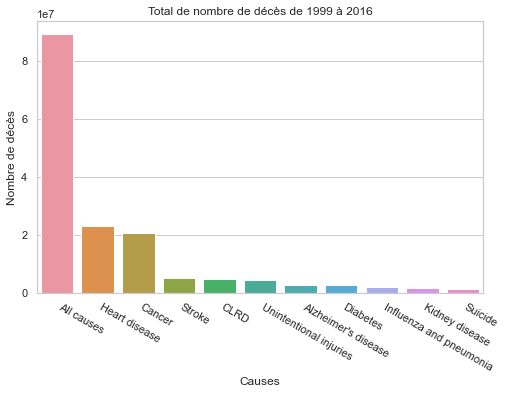

In [471]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
sns.set(style="whitegrid")

ax = sns.barplot(x="cause", y="number of death", data=numofdeath_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30, ha = 'left')
plt.xlabel("Causes")
plt.ylabel("Nombre de décès")
plt.title("Total de nombre de décès de 1999 à 2016")
plt.show()

`Analyse de données`

- Le graphique montre le nombre total de décès de chaque cause de 1999 à 2016
- Les maladies cardiaques et le cancer dominent la liste des causes de décès.

In [342]:
# creation de la base de données "projet"
mydb = client["MiniProjet2"]

# création d'une collection
collection = mydb["LeadingCauses"]

doc = collection.find_one()
doc

{'_id': ObjectId('63a8c99a8320cb5b2a74ac23'),
 'Year': 2016,
 'Cause_Name_113': 'Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
 'Cause_Name': 'Unintentional injuries',
 'State': 'Alabama',
 'Deaths': 2755,
 'Age_adjusted_Death_Rate': 55.5}

In [343]:
query = [{"$match": {"Cause_Name":'Heart disease'}},
        {"$group": {"_id": "$State", "Age adjusted death rate": {"$avg": "$Age_adjusted_Death_Rate"}}},
        {"$sort": {"Age adjusted death rate": -1}},
        {"$out": "heartDisease"}]

documents = collection.aggregate(query)

# creation de la base de données "projet"
mydb = client["MiniProjet2"]

# création d'une collection
collection = mydb["heartDisease"]

FIELDS = {'_id': True, 'Age adjusted death rate':True}

numofdeath = collection.find(projection=FIELDS)
numofdeath = list(numofdeath)

#numofdeath_df = pd.DataFrame(numofdeath)
#numofdeath_df.columns = ['cause', 'number of death']

pd.DataFrame(numofdeath)

,_id,Age adjusted death rate
0,Mississippi,279.661111
1,Oklahoma,261.305556
2,Alabama,256.183333
3,District of Columbia,250.450000
4,Louisiana,244.083333
5,Arkansas,242.627778
6,West Virginia,241.622222
7,Kentucky,240.916667
8,Tennessee,238.888889
9,New York,230.577778


## Évolution du taux de mortalité corrigé de l'âge du cancer et des maladies cardiaques au fil du temps

`Comment le taux de mortalité du cancer et des maladies cardiaques évolue-t-il dans le temps ?`

- Utilisez l'agrégation pour créer un pipeline et sauvegardez-le dans une nouvelle collection.
- Exportation de la collection CancerandHeart dans un fichier csv
- Utilisation de Pymongo pour l'interrogation et la visualisation.

In [362]:
mydb = client["MiniProjet2"]
collection = mydb["LeadingCauses"]

query = [    
        {"$match": {"$or" : [ {"Cause_Name": "Cancer"} , {"Cause_Name": "Heart disease"}] }},
        {"$match": { "State" : "United States"}},
        {"$sort" : {"Year": 1}},
        {"$out": "CancerandHeart"}
        ]

documents = collection.aggregate(query)

FIELDS = {'Year': True, "Cause_Name":True, "Age_adjusted_Death_Rate":True}


mydb = client["MiniProjet2"]
collection = mydb["CancerandHeart"]

ageadejusted = collection.find(projection=FIELDS)
ageadejusted = list(ageadejusted)




In [363]:
ageadejusted_df = pd.DataFrame(ageadejusted)
ageadejusted_df = ageadejusted_df.drop(columns=['_id'])

ageadejusted_df

,Year,Cause_Name,Age_adjusted_Death_Rate
0,1999,Cancer,200.8
1,1999,Heart disease,266.5
2,2000,Cancer,199.6
3,2000,Heart disease,257.6
4,2001,Cancer,196.5
5,2001,Heart disease,249.5
6,2002,Cancer,194.3
7,2002,Heart disease,244.6
8,2003,Cancer,190.9
9,2003,Heart disease,236.3


In [361]:
ageadejusted_df.index

Int64Index([1999, 1999, 2000, 2000, 2001, 2001, 2002, 2002, 2003, 2003, 2004,
            2004, 2005, 2005, 2006, 2006, 2007, 2007, 2008, 2008, 2009, 2009,
            2010, 2010, 2011, 2011, 2012, 2012, 2013, 2013, 2014, 2014, 2015,
            2015, 2016, 2016],
           dtype='int64', name='Year')

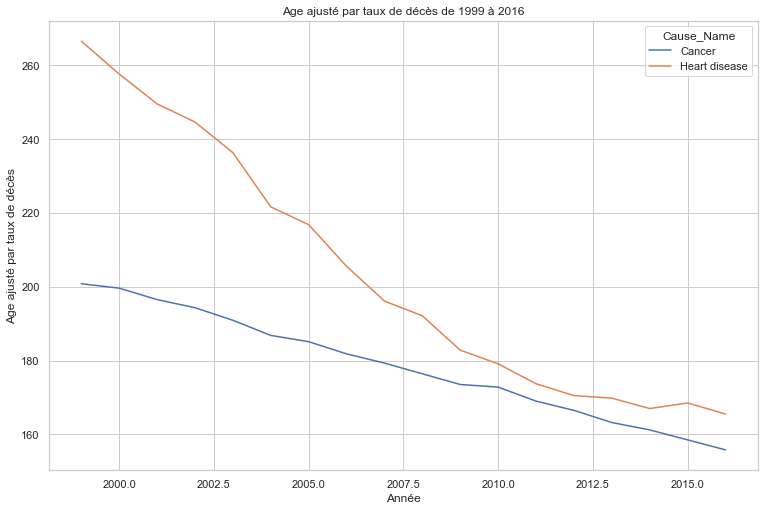

In [474]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
ax = sns.lineplot(x= "Year", y="Age_adjusted_Death_Rate",
             hue="Cause_Name",
             data=ageadejusted_df)
plt.xlabel("Année")
plt.ylabel("Age ajusté par taux de décès")
plt.title("Age ajusté par taux de décès de 1999 à 2016")
plt.show()

`Analyse de données`


- Le cancer et les maladies cardiaques sont au centre de l'attention car ils ont dominé les autres causes de décès.
- Le cancer et les maladies cardiaques ont diminué au fil du temps, probablement en raison des progrès technologiques.
- Les maladies cardiaques avaient un taux de mortalité élevé en 1999 et ont rapidement diminué au cours de la dernière décennie.

In [388]:
mydb = client["MiniProjet2"]
collection = mydb["LeadingCauses"]

collection.find_one()

{'_id': ObjectId('63a8c99a8320cb5b2a74ac23'),
 'Year': 2016,
 'Cause_Name_113': 'Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
 'Cause_Name': 'Unintentional injuries',
 'State': 'Alabama',
 'Deaths': 2755,
 'Age_adjusted_Death_Rate': 55.5}

## Analyse généralisée de la mortalité par localisation
`Quels États ont le plus grand nombre de décès, toutes causes confondues ?`

1. Analyse des différents taux de mortalité au niveau des États.
2. Comparaison entre le nombre total de décès et la population totale des différents États.
3. Création d'une visualisation convaincante à l'aide de MongoDB pour représenter les grandes variations des données.

In [391]:
mydb = client["MiniProjet2"]
collection = mydb["LeadingCauses"]

query = [    
        {"$match": {"Cause_Name":"All causes"}},
        {"$group": {"_id": "$State", "Deaths": {"$avg": "$Deaths"}}},
        {"$sort" : {"Deaths": -1}},
        {"$skip" : 1},
        {"$out": "avgDeathbyST"}
    ]

documents = collection.aggregate(query)

FIELDS = {'_id': True, 'Deaths':True}

mydb = client["MiniProjet2"]
collection = mydb["avgDeathbyST"]

avgDeath = collection.find(projection=FIELDS)
avgDeath = list(avgDeath)



In [393]:
mydb = client["MiniProjet2"]
collection = mydb["statepops"]

query = ([
    {"$match": {"Year": {"$gt": 1998}}},
    {"$group": {
                "_id": "$State",
                "population": {"$avg":{"$multiply": ["$population" , 1000000]}},
                }
    },
    {"$sort" : {"population": -1}},
    {"$out": "popperstate"}
])

documents = collection.aggregate(query)

FIELDS = {'_id': True, "population":True}

mydb = client["MiniProjet2"]
collection = mydb["popperstate"]

PopPerState = collection.find(projection=FIELDS)
PopPerState = list(PopPerState)



In [394]:
avgDeath_df = pd.DataFrame(avgDeath)
PopPerState_df = pd.DataFrame(PopPerState)




In [395]:
avgDeath_df.head()

,_id,Deaths
0,California,239281.277778
1,Florida,173951.277778
2,Texas,164957.055556
3,New York,152309.888889
4,Pennsylvania,128549.055556


In [396]:
PopPerState_df.head()

,_id,population
0,California,3.667951e+07
1,Texas,2.429297e+07
2,New York,1.932651e+07
3,Florida,1.836098e+07
4,Illinois,1.268792e+07


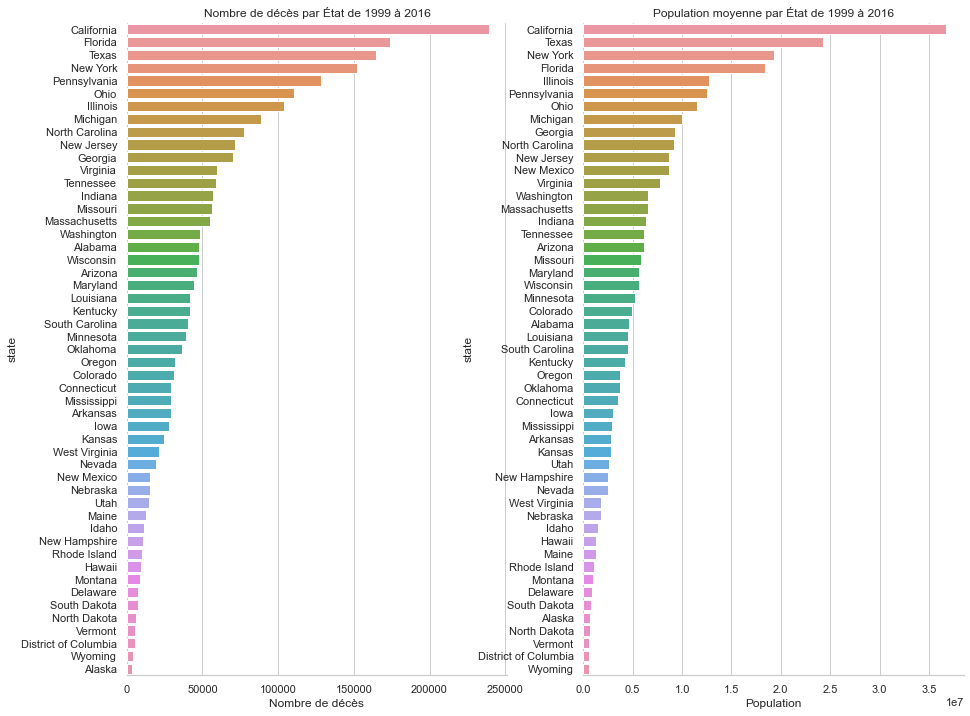

In [467]:
avgDeath_df.columns = ['state', 'Nombre de décès']
PopPerState_df.columns = ['state', 'Population']

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15, 12))
sns.despine(left=True)

sns.barplot(x='Nombre de décès', y="state", data=avgDeath_df, ax=axes[0])\
.set_title("Nombre de décès par État de 1999 à 2016")

sns.barplot(x="Population", y='state', data=PopPerState_df, ax=axes[1])\
.set_title("Population moyenne par État de 1999 à 2016")

plt.show()

`Analyse des graphiques`
- La Californie a le plus grand nombre de décès, toutes causes confondues, mais elle a le nombre moyen d'habitants le plus élevé.
- La Floride a le deuxième taux de mortalité le plus élevé, mais elle se situe au quatrième rang en termes de population. Cela implique que la Floride a un taux de mortalité par habitant élevé.

In [408]:
collection.find_one()

{'_id': ObjectId('63a8df3a8320cb5b2a74e1e9'),
 'Year': 1962,
 'WEEK': 1,
 'Week_Ending_Date': '01/06/1962',
 'REGION': 1,
 'State': 'MA',
 'City': 'Boston',
 'Pneumonia_and_Influenza_Deaths': 11.0,
 'All_Deaths': 262.0,
 '<1_year_(all_cause_deaths)': 10.0,
 '1-24_years_(all_cause_deaths)': 8.0,
 '25-44_years': 11.0,
 '45-64_years_(all_cause_deaths)': 87.0,
 '65+_years_(all_cause_deaths)': 146.0}

In [417]:
mydb = client["MiniProjet2"]
collection = mydb["deathInUsCities"]

query = [
    {'$match': {'Year': {'$gt': 1998}}},
    {'$group': { 
                "_id": "$Year", 
                "<1 year (all cause deaths)": {"$sum": "$<1 year (all cause deaths)"},
                "1-24 years (all cause deaths)": {"$sum": "$1-24 years (all cause deaths)"},
                "25-44 years": {"$sum": "$25-44 years"},
                "45-64 years (all cause deaths)": {"$sum": "$45-64 years (all cause deaths)"},
                "65+ years (all cause deaths)": {"$sum": "$65+ years (all cause deaths)"}
            }
    },
    {"$sort": {"_id": 1}},
    {"$out": "DeathbyAgeGroup"}
]

documents = collection.aggregate(query)

FIELDS = {'_id': True, "<1 year (all cause deaths)":True, 
         "1-24 years (all cause deaths)":True, "25-44 years":True, 
         "45-64 years (all cause deaths)":True, "65+ years (all cause deaths)":True}

mydb = client["MiniProjet2"]
collection = mydb["DeathbyAgeGroup"]

DeathbyAgeGroup = collection.find(projection=FIELDS)
DeathbyAgeGroup = list(DeathbyAgeGroup)


In [418]:
DeathbyAgeGroup_df = pd.DataFrame(DeathbyAgeGroup)
DeathbyAgeGroup_df.columns = ['Year', "<1 year", "1-24 years","25-44 years",'45-64 years','65+ years']
DeathbyAgeGroup_df= DeathbyAgeGroup_df.set_index('Year')

Text(0.5, 1.0, 'Number of death per year by age group from 1999 to 2016')

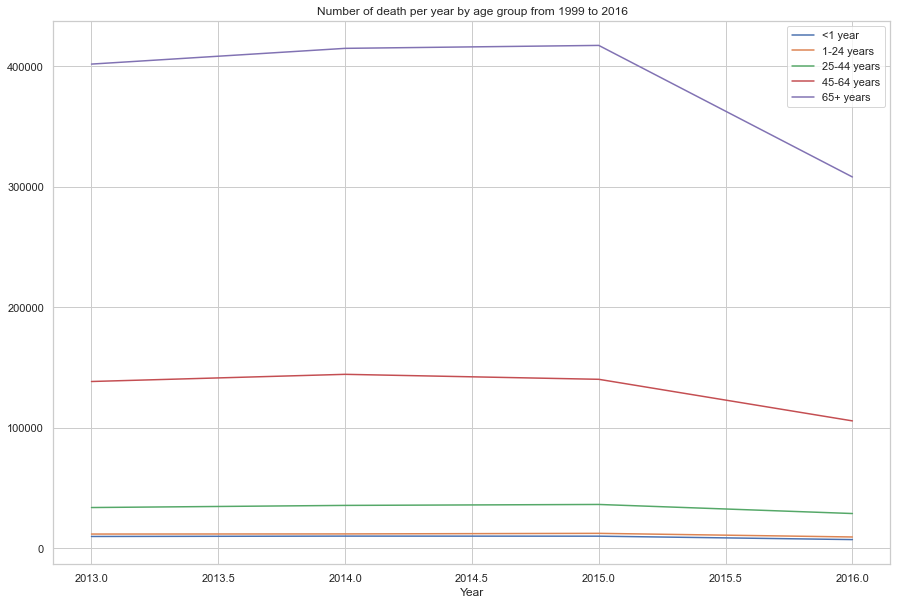

In [420]:
DeathbyAgeGroup_df.plot.line(figsize=(15,10))
plt.title("Number of death per year by age group from 1999 to 2016")

`Analyse des graphiques`
- Sans surprise, ce sont les personnes de plus de 65 ans qui sont les plus nombreuses à mourir.
- On constate une diminution du nombre de décès dans tous les groupes d'âge au fil du temps.

## Nombre moyen de décès de personnes âgées par État

`Quels sont les États où le nombre moyen de décès de personnes âgées est le plus élevé ?`

In [446]:
mydb = client["MiniProjet2"]
collection = mydb["deathInUsCities"]

query = [
    {"$match": {"Year": {"$gt": 1998}}},
    {"$group": { 
                "_id": {"Year": "$Year", "State": "$State"},
                "65+ years (all cause deaths)": {"$sum": "$65+ years (all cause deaths)"}
            }
    },
    {"$group": {
                "_id": "$_id.State" ,
                "65+ years (all cause deaths)": {"$avg": "$65+ years (all cause deaths)"}
    }},
    {"$sort": { "65+ years (all cause deaths)": -1}},
    {"$limit": 3},
    {"$out": "ElderyDeathbycities"}
]
documents = collection.aggregate(query)

FIELDS = {'_id': True, "65+ years (all cause deaths)":True}

mydb = client["MiniProjet2"]
collection = mydb["ElderyDeathbycities"]

elderlyDeath = collection.find(projection=FIELDS)
elderlyDeath = list(elderlyDeath)


In [447]:
elderlyDeath_df = pd.DataFrame(elderlyDeath)
elderlyDeath_df = elderlyDeath_df[elderlyDeath_df.columns[::-1]]

In [448]:
elderlyDeath_df.columns = ['Average Number of Death', 'state']

In [449]:
elderlyDeath_df = elderlyDeath_df.set_index('state')

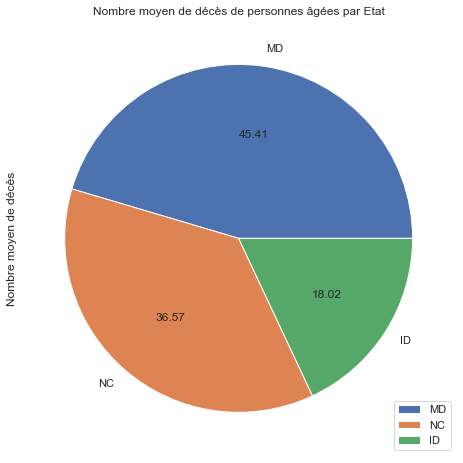

In [455]:
elderlyDeath_df.plot.pie(subplots = True, figsize = (10,8), autopct='%.2f')
plt.title('Nombre moyen de décès de personnes âgées par Etat')
plt.ylabel("Nombre moyen de décès")
plt.xlabel("")
plt.show()

`Analyse des graphiques`
- Ce graphique montre les trois États où le nombre de décès de personnes âgées est le plus élevé.
- Maryland a le nombre moyen de décès le plus élevé parmi les personnes âgées de plus de 65 ans.

<a name="Concl"></a>
## **Conclusion**

1. Nous nous améliorons considérablemment !
2. Il existe toujours une grande disparité géographique entre la réduction des taux de mortalité
3. Les décès dus au cancer et aux maladies cardiaques ont considérablement diminué au cours de la dernière décennie

## **Travaux futurs**

- Superposer des données économiques pour mieux évaluer l'effet de la richesse sur les paramètres de mortalité.
- Créer des graphiques interactifs avec des données actualisées en direct.
- Construire une pile ETL automatisée pour permettre le chargement rapide de nouvelles données dans le système.

## De même sur `Neo4J, Redis`

![imag](images/neo4j.png)

![imag](images/redis.png)

# Fin du projet